# Car price analysis using regression multi layer neural network
Here's a brief analysis of a data set that contains several features, the prupouse of this work is the following 
1. Prepare the data  
2. Describe the data 
3. Identify important features
4. Make a multi layer model to predict car price

## Prepare the data 
On this section I want to prepare my data set, I want to erase the null values and unify the value contents. 

In [ ]:
# First I'm gonna upload the packages I'll need to complete the previously mentioned tasks. 
import pandas as pd 
import numpy as np 

#First I'll import the data from a csv  
df = pd.read_csv("CarPrice_Assignment.csv")
des = pd.read_excel("Data Dictionary - carprices.xlsx")

First we will check the description we have to help us analyse

In [ ]:
des=des.dropna()


In [ ]:
des

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13


In [ ]:
# Now it's time to show the data and see what it contains 
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
# We will not use the car ID since we don't need to specify individual values 
df = df.drop('car_ID',axis=1)

There's different types of values and we also need to find missing values 

In [ ]:
import missingno
import matplotlib.pyplot as plt 


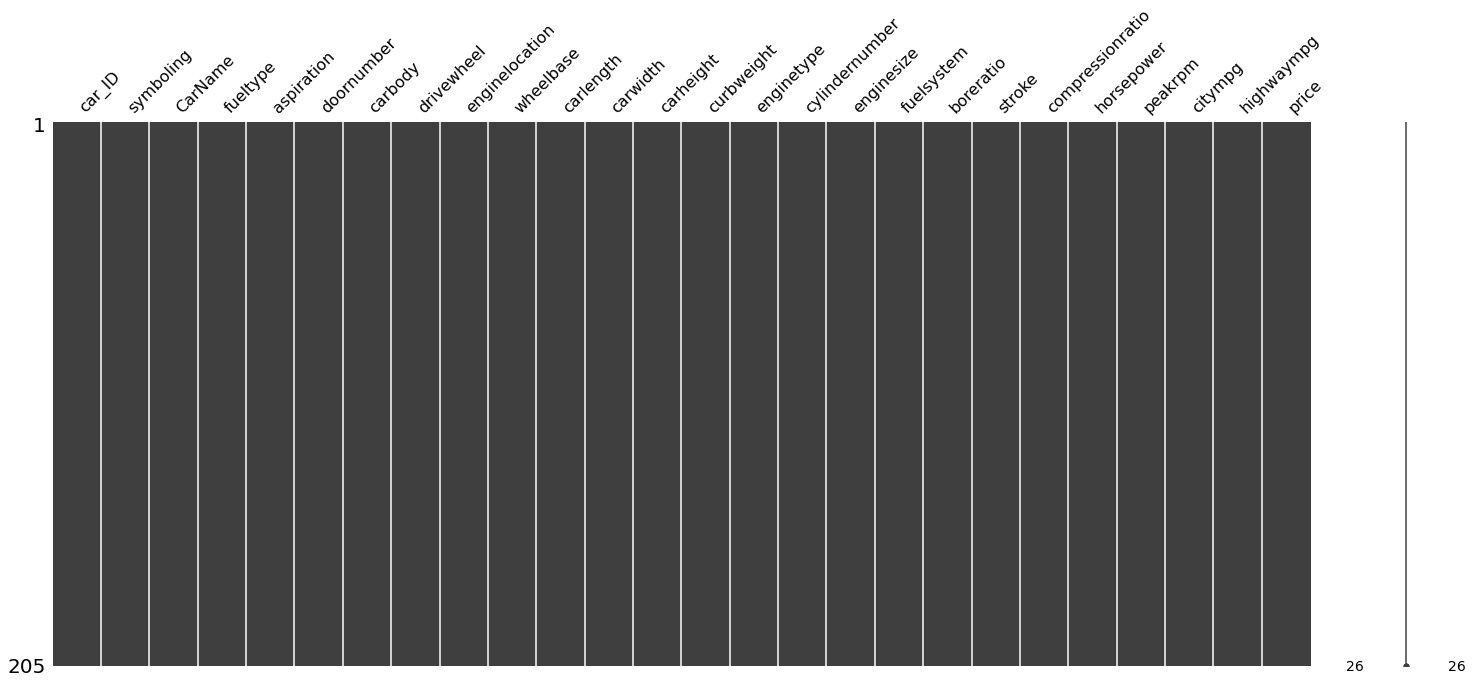

In [ ]:
missingno.matrix(df)

In [ ]:
# We can see there's no missing values so we can continue

In [ ]:
df.CarName = df.CarName.str.split(' ', expand=True).iloc[:, 0]
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

We identify some names that are referring to the same label but are written differenty so we will unify by replacing

In [ ]:
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [ ]:
#We verify the ojects are correctly named on the rest of the dataset
features=['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']


In [99]:
#We verify the names arre correctly on objects columns
for col in df:
  print(df[col].unique())

[ 3  1  2  0 -1 -2]
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1]
[168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 178.4 173.  172.4 165.3 170.2 165.6 162.4 173.4 181.7 184.6
 178.5 186.7 1

Now it's time to review if there's some data we may have duplicated 

In [ ]:
df.duplicated().sum()

0

It's important to separate the numerical and categorical data, so we can describe. For this we will do the following: 

In [ ]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns

In [ ]:
df_cat = df[cat_col]
df_num = df[num_col]

## Describe the data 
Now it's time to describe the data, we will obtain the mean, median, mode, standar deviation and some visualizations 

In [ ]:
# We will use spicy to calculate the mode of the numerical value 
from scipy import stats 
import seaborn as sns


In [ ]:
df_num_mean = df_num.mean()

In [ ]:
df_num_median = df_num.median()

In [ ]:
df_num_mode = df_num.mode().iloc[0, :]

In [86]:
df_num_std = df_num.std()

Now, after obtaining robust estimates like the median and others affected by outliers like the mean we proceed to compare. 

In [87]:
# For this we will create a new data frame with the prevoius calculated values 
df_central_values = pd.DataFrame().assign(mean=df_num_mean, median=df_num_median, mode=df_num_mode, standar_deviation=df_num_std)
print(df_central_values)

                          mean    median     mode  standar_deviation
symboling             0.834146      1.00     0.00           1.245307
wheelbase            98.756585     97.00    94.50           6.021776
carlength           174.049268    173.20   157.30          12.337289
carwidth             65.907805     65.50    63.80           2.145204
carheight            53.724878     54.10    50.80           2.443522
curbweight         2555.565854   2414.00  2385.00         520.680204
enginesize          126.907317    120.00    92.00          41.642693
boreratio             3.329756      3.31     3.62           0.270844
stroke                3.255415      3.29     3.40           0.313597
compressionratio     10.142537      9.00     9.00           3.972040
horsepower          104.117073     95.00    68.00          39.544167
peakrpm            5125.121951   5200.00  5500.00         476.985643
citympg              25.219512     24.00    31.00           6.542142
highwaympg           30.751220    

We are aware that median, mode and mean are similar in features like:
1. wheelbase
2. carwidth
3. carheight 
4. boreratio
5. stroke 
6. citympg
7. highwaympg

These features may have a distribution that is symmetric and unimodal, however we need to continue analyzing to conclude this. The information showed above can be seen in a boxplot where the std and them percentiles can be observed as well as the outliers. 

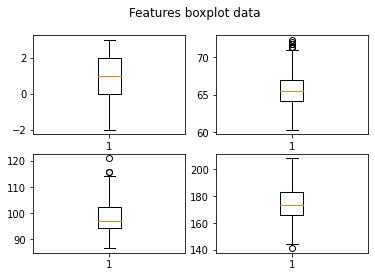

<Figure size 720x504 with 0 Axes>

In [120]:
# We can use a boxplot to check visually the data distribuion 
fig, axs = plt.subplots(2,2)
fig.suptitle('Features boxplot data')
axs[0,0].boxplot(df_num["symboling"])
axs[1,0].boxplot(df_num["wheelbase"])
axs[1,1].boxplot(df_num["carlength"])
axs[0,1].boxplot(df_num["carwidth"])
fig = plt.figure(figsize =(10, 7))
 

KstestResult(statistic=0.39256425826366487, pvalue=5.593612712180038e-29)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.9944573765569173, pvalue=0.0)
KstestResult(statistic=0.9808598328088434, pvalue=0.0)
KstestResult(statistic=0.9999999999987201, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
